## AIDI 2004-01
## Final Project
### Submitted by: Group 2:
#### Bavithra Ganesan (100900119)
#### Jasmeet Kaur (100881373)
#### Pritesh Dalal (100872247) 
#### Rutvik Shah (100886648)

### Problem Statement
Fake news detection is becoming increasingly important in today's society due to the significant impact it can have on individuals and society as a whole. The spread of false or misleading information can have serious consequences, particularly when it comes to issues of public health, safety, and political decision-making.

One of the primary reasons why fake news detection is important is to protect individuals and society from harm. False information about health treatments, for example, can lead people to take ineffective or harmful medication, while false information about natural disasters can lead to people failing to evacuate, resulting in injury or death. The spread of fake news can also contribute to social unrest and political instability, as people may make decisions based on misinformation that they believe to be true.

In addition to protecting individuals and society from harm, fake news detection can also help preserve the integrity of news reporting and the media. The spread of fake news can damage the credibility of news organizations and journalists, making it difficult for people to trust the news they receive. By detecting and flagging fake news, it is possible to ensure that only accurate and reliable information is shared, helping to restore trust in the media and prevent the spread of false information.

Overall, the importance of fake news detection cannot be overstated, as it is a critical tool for promoting public safety, protecting individual rights, and preserving the integrity of news reporting and the media

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('news.csv')
dataframe.head()
dataframe.shape

(6335, 4)

### Exploratory Data Analysis

In [3]:
# checking for missing values
dataframe.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

#### Outlier Detection and Treatment

Adding a new column 'length' to compute the length of the text

In [4]:
length = []
[length.append(len(str(text))) for text in dataframe['text']]
dataframe['length'] = length
dataframe.head()

,Unnamed: 0,title,text,label,length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


#### Finding Minimum, maximum length of the text

**min(train_data['length']):** This computes the minimum value of the length column in the train_data dataframe. This would be the length of the shortest news article in the training set.


**max(train_data['length']):** This computes the maximum value of the length column in the train_data dataframe. This would be the length of the longest news article in the training set.

In [5]:
min(dataframe['length']), max(dataframe['length'])

(1, 115372)

**Interpretation:**
The minimum value of 1 as size of text of the dataset implies that there are outliers present in the dataset. As small size texts represent empty text or irrelevant information that cannot be regarded as news.

Finding number of records where length of text is less than 50. These records will be considered as outliers

In [6]:
len(dataframe[dataframe['length'] < 50])

45

There are 45 outliers in the text. This number is small compared to total records and therefore we can drop them.

Printing records where length of text is less than 50

In [7]:
dataframe['text'][dataframe['length'] < 50]

106                                                  
238     Hillary Clinton can’t believe she’s losing.  
710                                                  
806                                                  
919                                                  
940                                                  
1268       Posted: Nov 6th, 2016 by MADJEZ   MADJEZ  
1664                                                 
1736                                                 
1851                                                 
1883                                                 
1941                                                 
2244                                                 
2261      Should the U.S. Continue to Support Israel?
2426                                                 
2576                                                 
2650                                     11/08/2016  
2662                                                 
2788                        

In [8]:
# dropping the outliers
dataframe = dataframe.drop(dataframe['text'][dataframe['length'] < 50].index, axis = 0)

In [9]:
#Printing minimum and maximum length
min(dataframe['length']), max(dataframe['length'])

(50, 115372)

#### Creating Visual Charts

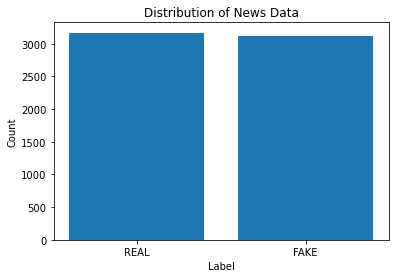

In [10]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label in the 'label' column
label_counts = dataframe['label'].value_counts()

# Create a bar plot using the label counts
plt.bar(label_counts.index, label_counts.values)

# Add labels and title to the plot
plt.title('Distribution of News Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()


The plot shows data is evenly distributed

In [11]:
!pip install wordcloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### Generating word Cloud for Fake News

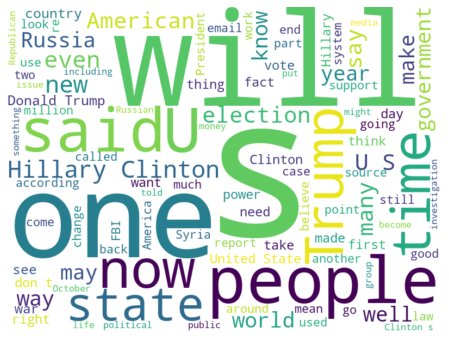

In [13]:
wc = WordCloud(width=800, height=600, background_color='white', max_words=100)

# Generate a word cloud for transformed content of true news articles with label 'FAKE'
fake_news_wc = wc.generate(dataframe[dataframe['label'] == 'FAKE']['text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Fake News contains words like said, will, people, time etc

#### Generating word Cloud for Real News

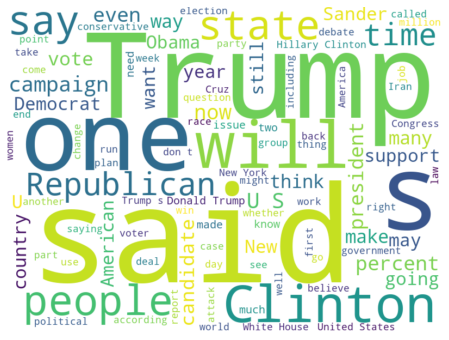

In [14]:
wc = WordCloud(width=800, height=600, background_color='white', max_words=100)

# Generate a word cloud for transformed content of true news articles with label 0
fake_news_wc = wc.generate(dataframe[dataframe['label'] == 'REAL']['text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Real News contains words like Trump, state, said, say, state etc.

### Data Preparation for Modelling

In [15]:
x = dataframe['text']
y = dataframe['label']

In [16]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6290, dtype: object

In [17]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6290, dtype: object

### Splitting the Dataset

The train_test_split function from the scikit-learn library is used to split the data into training and testing sets. In the code you provided, the X and y variables represent the input features and output targets respectively.

The test_size parameter specifies the proportion of the data to be used for testing. In this case, it is set to 0.2, which means that 20% of the data will be used for testing and 80% for training.

The random_state parameter sets the random seed for the random number generator used by the train_test_split function. This ensures that the same split is obtained each time the code is run, making the results reproducible.

The resulting X_train, X_test, y_train, and y_test variables contain the training and testing data, which can be used to train and evaluate the machine learning model

In [18]:
#importing required modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

4       REAL
4224    FAKE
3050    FAKE
6110    FAKE
3514    FAKE
        ... 
4965    FAKE
3285    REAL
1660    FAKE
2623    REAL
2750    REAL
Name: label, Length: 5032, dtype: object

In [21]:
y_train

4       REAL
4224    FAKE
3050    FAKE
6110    FAKE
3514    FAKE
        ... 
4965    FAKE
3285    REAL
1660    FAKE
2623    REAL
2750    REAL
Name: label, Length: 5032, dtype: object

### Building Model: using Passive Aggressive Classifier

### Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

In [22]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

**Explanation**
The code is using scikit-learn's TfidfVectorizer to transform the training and testing data into a numerical representation for machine learning algorithms.

The TfidfVectorizer converts a collection of raw text documents to a matrix of TF-IDF features, where each row represents a document and each column represents a feature (a unique word in the corpus).

The parameter stop_words='english' removes common English stop words like "the", "a", "an", "and", etc.

The parameter max_df=0.7 sets the threshold for the maximum document frequency. Words that occur in more than 70% of the documents will be ignored as they may not be informative.

The code first fits the TfidfVectorizer on the training data x_train using tfvect.fit_transform(x_train). This step learns the vocabulary and computes the inverse document frequency (IDF) weights for each term in the training data.

The resulting tfid_x_train is a sparse matrix where each row represents a document in the training data and each column represents a feature in the vocabulary. The values in the matrix represent the TF-IDF weights of each feature in the corresponding document.

The code then applies the same transformation to the testing data using tfvect.transform(x_test) to get the tfid_x_test matrix, which will be used to evaluate the performance of the machine learning model trained on the training data.

In [23]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

**Explanation:**
The code is using scikit-learn's PassiveAggressiveClassifier to train a binary classification model on the training data tfid_x_train and its corresponding labels y_train.

The max_iter parameter sets the maximum number of iterations that the algorithm should run before stopping. The algorithm updates the model parameters using each training example one at a time, and max_iter=50 means that it will run for a maximum of 50 iterations.

The PassiveAggressiveClassifier is a linear classifier that updates its parameters in an online manner, meaning that it can learn from new examples as they arrive without needing to retrain on the entire dataset. It is often used for binary classification tasks and is particularly useful when dealing with large datasets that do not fit into memory.

The fit() method trains the model on the training data and labels by updating the model parameters based on the TF-IDF feature representations of the documents in tfid_x_train and their corresponding labels in y_train.

After the model is trained, it can be used to make predictions on new data by calling the predict() method on the TF-IDF feature representation of the new data.

In [24]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.36%


The code is using the trained PassiveAggressiveClassifier model to make predictions on the testing data tfid_x_test using the predict() method, which returns a numpy array of predicted labels y_pred.

The accuracy_score() function from scikit-learn is then used to calculate the accuracy of the predictions by comparing the predicted labels y_pred to the true labels of the testing data y_test.


In [25]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[573  35]
 [ 36 614]]


In [26]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [27]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [28]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

The code saves the PassiveAggressiveClassifier model classifier as a pickle file named model.pkl using the pickle.dump() function.

The open() function is used to open the file in binary write mode wb, and the pickle.dump() function is used to write the model to the file.

The pickle.load() function is then used to load the trained model from the pickle file model.pkl into the variable loaded_model.

The function fake_news_det1() is then defined, which takes a single string argument news representing the news article to be classified.

The function first puts the input string into a list and assigns it to input_data.

The transform() method of the TfidfVectorizer tfvect is then used to convert the input data into a numerical feature representation that can be used as input to the model. This results in a sparse matrix representation of the input data, which is assigned to vectorized_input_data.

Finally, the predict() method of the trained loaded_model is used to predict the label of the input data, based on its feature representation. The resulting prediction is stored in the prediction variable.

The function then prints the predicted label using the print() function.

Let's use our model to predict the type of news: FAKE or REAL

In [29]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [30]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']
